<a href="https://colab.research.google.com/github/ranjith13119/CNN/blob/main/MobileNet_Facemask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, Lambda
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==2.1.0

In [ ]:
import tensorflow as tf 
tf.__version__

'2.1.0'

In [ ]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32
IMAGE_SIZE = [224, 224]

In [ ]:
TRAINING_DIR = "/content/drive/MyDrive/CNN/face-mask-dataset/Dataset/train/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  rotation_range=20,
                                  zoom_range=0.15,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.15,
                                  horizontal_flip=True,
                                  fill_mode="nearest")

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=10, 
                                                    target_size=(244,244))
VALIDATION_DIR = "/content/drive/MyDrive/CNN/face-mask-dataset/Dataset/test/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                         batch_size=10, 
                                                         target_size=(244,244))

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
from glob import glob
folders = glob('/content/drive/MyDrive/CNN/face-mask-dataset/Dataset/train/train/*')

In [ ]:
folders

['/content/drive/MyDrive/CNN/face-mask-dataset/Dataset/train/train/without_mask',
 '/content/drive/MyDrive/CNN/face-mask-dataset/Dataset/train/train/with_mask']

In [ ]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_shape=(224, 224, 3))

In [ ]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(len(folders), activation="sigmoid")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [ ]:
model.summary()

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
face_model = model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=EPOCHS,
  steps_per_epoch=32,
  validation_steps=len(validation_generator)
)

In [ ]:
model.save("/content/drive/MyDrive/CNN/MaskTest_MobileNetV2_App_v.2.1.0_sigmoid.h5") 

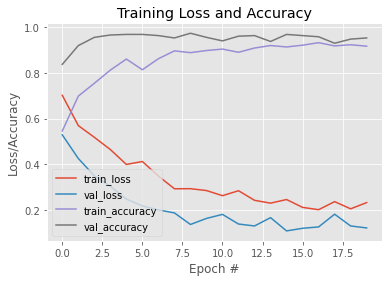

In [ ]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), face_model.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), face_model.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), face_model.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), face_model.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [ ]:
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/sr6033/face-detection-with-OpenCV-and-DNN.git

Cloning into 'opencv'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 286419 (delta 1), reused 0 (delta 0), pack-reused 286404
Receiving objects: 100% (286419/286419), 476.45 MiB | 22.40 MiB/s, done.
Resolving deltas: 100% (200079/200079), done.
Checking out files: 100% (6688/6688), done.
Cloning into 'face-detection-with-OpenCV-and-DNN'...
remote: Enumerating objects: 34, done.
remote: Total 34 (delta 0), reused 0 (delta 0), pack-reused 34
Unpacking objects: 100% (34/34), done.


[INFO] loading face detector model...
[INFO] loading face mask detector model...
[INFO] computing face detections...
[[0.9464384  0.02457386]]


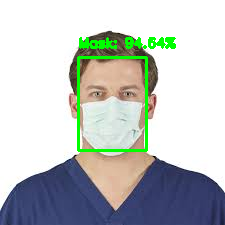

In [ ]:
# import the necessary libraries
import cv2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import argparse
from google.colab.patches import cv2_imshow
from natsort import natsorted, ns
 
input_file_path = "/content/drive/MyDrive/CNN/download (1).jpg"
print("[INFO] loading face detector model...")
prototxtPath = "/content/opencv/samples/dnn/face_detector/deploy.prototxt"
weightsPath = "/content/face-detection-with-OpenCV-and-DNN/res10_300x300_ssd_iter_140000.caffemodel"
net = cv2.dnn.readNet(prototxtPath, weightsPath)
# load the face mask detector

print("[INFO] loading face mask detector model...")

model = load_model("/content/drive/MyDrive/CNN/MaskTest_MobileNetV2_App_v.2.1.0_sigmoid.h5")
def process_images(input_file_path):

  # load the input imag

  # dimensions
  image = cv2.imread(input_file_path)
  (h, w) = image.shape[:2]
  # construct a blob from the image
  blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
    (104.0, 177.0, 123.0))
 # pass the blob through the network and obtain the face detections
  print("[INFO] computing face detections...")

  net.setInput(blob)

  detections = net.forward()

  # loop over the detections

  for i in range(0, detections.shape[2]):

    # extract the confidence associated with

    # the detection

    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the confidence is

    # greater than the minimum confidence

    if confidence > 0.5:

      # compute the (x, y)-coordinates of the bounding box for

      # the object

      box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])

      (startX, startY, endX, endY) = box.astype("int")

      # ensure the bounding boxes fall within the dimensions of

      # the frame

      (startX, startY) = (max(0, startX), max(0, startY))

      (endX, endY) = (min(w - 1, endX), min(h - 1, endY))

      # extract the face ROI, convert it from BGR to RGB channel

      # ordering, resize it to 244,244, and preprocess it

      face = image[startY:endY, startX:endX]

      face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

      face = cv2.resize(face, (224, 224))

      face = img_to_array(face)

      face = preprocess_input(face)

      face = np.expand_dims(face, axis=0)

      # pass the face through the model to determine if the face

      # has a mask or not
      mask1 = model.predict(face) 
      print(mask1)
      (mask, withoutMask) = model.predict(face)[0]
      
      # determine the class label and color we'll use to draw

      # the bounding box and text

      label = "Mask" if mask > withoutMask else "No Mask"

      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

   # include the probability in the label

      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

      # display the label and bounding box rectangle on the output

      # frame

      #cv2.putText(image, label, (startX, startY - 10),
      cv2.putText(image, label, (startX, startY - 10),

        cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)

      cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)

  # show the output image

  save_path = input_file_path.split(".",1)

  cv2_imshow(image)

#start the process

process_images(input_file_path)